<a href="https://colab.research.google.com/github/hannahscha/individual-machine-learning/blob/main/Individual_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading libraries

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
!pip install catboost
!pip install xgboost
!pip install lightgbm

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

sns.set_theme(context='notebook', palette='pastel', style='whitegrid')

# Reading Data

In [399]:
df = pd.read_csv('/content/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [400]:
df.shape
# there are 394 students with 30 features and 3 outputs

(395, 33)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [402]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


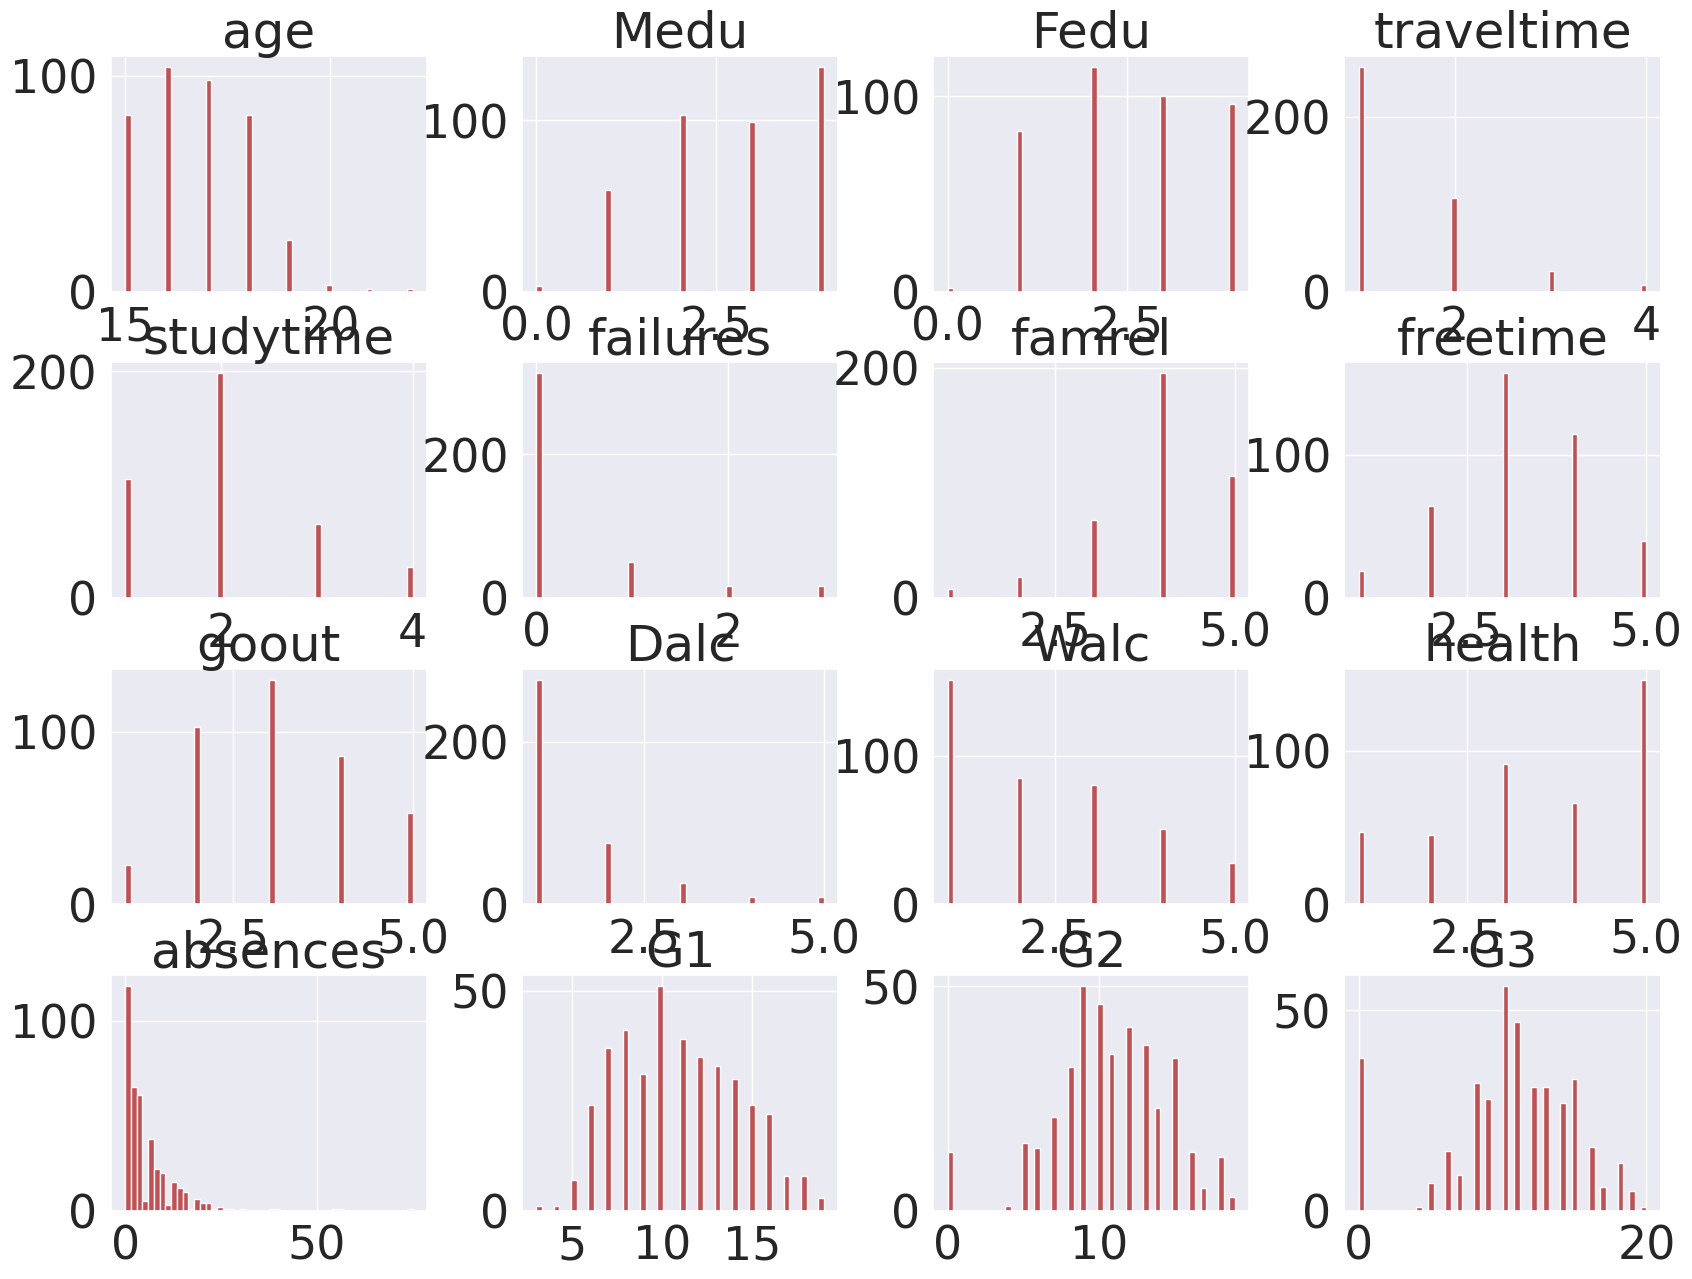

In [403]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15), color='r')
plt.show()

In [404]:
import plotly.express as px
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'G1', 'G2', and 'G3'
fig = px.histogram(df, x=["G1", "G2", "G3"],
                   barmode='stack',
                   labels={"variable": "Semester", "value": "Grades"},
                   color_discrete_sequence=['#F79F81', '#9FF781', '#CED8F6'],
                   title="Distribution of Student's Grades")
fig.update_layout(font=dict(size=16))
fig.show()

# Data preprocessing

In [405]:
# prompt: check df for missing data and if there is replace with mean

# Check for missing values
print(df.isnull().sum())

# Replace missing values with the mean for numerical columns
for col in df.select_dtypes(include=np.number):
  df[col] = df[col].fillna(df[col].mean())

# Verify that missing values have been replaced
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health     

In [406]:
# prompt: ues onehot encoding to convert categorical variables

# One-hot encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Print the updated DataFrame to verify the changes
print(df.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [407]:
# prompt: convert all binary columns to integers and explain what each integer means

# Assuming 'df' is your DataFrame as defined in the previous code.

# Identify binary columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Loop through binary columns and convert them to integers
for col in binary_cols:
    unique_vals = df[col].unique()
    # Assign 0 and 1 based on the order of unique values
    mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
    print(f"Column '{col}': {mapping}") # Explain the mapping
    df[col] = df[col].map(mapping)

# Print the updated DataFrame to verify the changes
print(df.head())


Column 'school_MS': {False: 0, True: 1}
Column 'sex_M': {False: 0, True: 1}
Column 'address_U': {True: 0, False: 1}
Column 'famsize_LE3': {False: 0, True: 1}
Column 'Pstatus_T': {False: 0, True: 1}
Column 'Mjob_health': {False: 0, True: 1}
Column 'Mjob_other': {False: 0, True: 1}
Column 'Mjob_services': {False: 0, True: 1}
Column 'Mjob_teacher': {False: 0, True: 1}
Column 'Fjob_health': {False: 0, True: 1}
Column 'Fjob_other': {False: 0, True: 1}
Column 'Fjob_services': {False: 0, True: 1}
Column 'Fjob_teacher': {True: 0, False: 1}
Column 'reason_home': {False: 0, True: 1}
Column 'reason_other': {False: 0, True: 1}
Column 'reason_reputation': {False: 0, True: 1}
Column 'guardian_mother': {True: 0, False: 1}
Column 'guardian_other': {False: 0, True: 1}
Column 'schoolsup_yes': {True: 0, False: 1}
Column 'famsup_yes': {False: 0, True: 1}
Column 'paid_yes': {False: 0, True: 1}
Column 'activities_yes': {False: 0, True: 1}
Column 'nursery_yes': {True: 0, False: 1}
Column 'higher_yes': {True:

# Correlations

In [408]:
# we will drop those columns to make it more hard to predict and see which
# personal attributes impact the most on the final grade.
df.drop(['G1', 'G2'], axis=1, inplace=True)

new_corr = df.corr()
print(new_corr['G3'].sort_values(ascending=False))

G3                   1.000000
Medu                 0.217147
Fedu                 0.152457
Mjob_health          0.116158
sex_M                0.103456
paid_yes             0.101996
internet_yes         0.098483
studytime            0.097820
reason_reputation    0.095692
schoolsup_yes        0.082788
famsize_LE3          0.081407
Mjob_services        0.078429
Mjob_teacher         0.057712
Fjob_health          0.057111
reason_other         0.052008
famrel               0.051363
absences             0.034247
activities_yes       0.016100
freetime             0.011307
Fjob_services       -0.016108
reason_home         -0.021359
guardian_mother     -0.022338
famsup_yes          -0.039157
school_MS           -0.045017
nursery_yes         -0.051568
Walc                -0.051939
Fjob_other          -0.053483
Dalc                -0.054660
Pstatus_T           -0.058009
health              -0.061335
guardian_other      -0.087774
Fjob_teacher        -0.095374
Mjob_other          -0.096477
address_U 

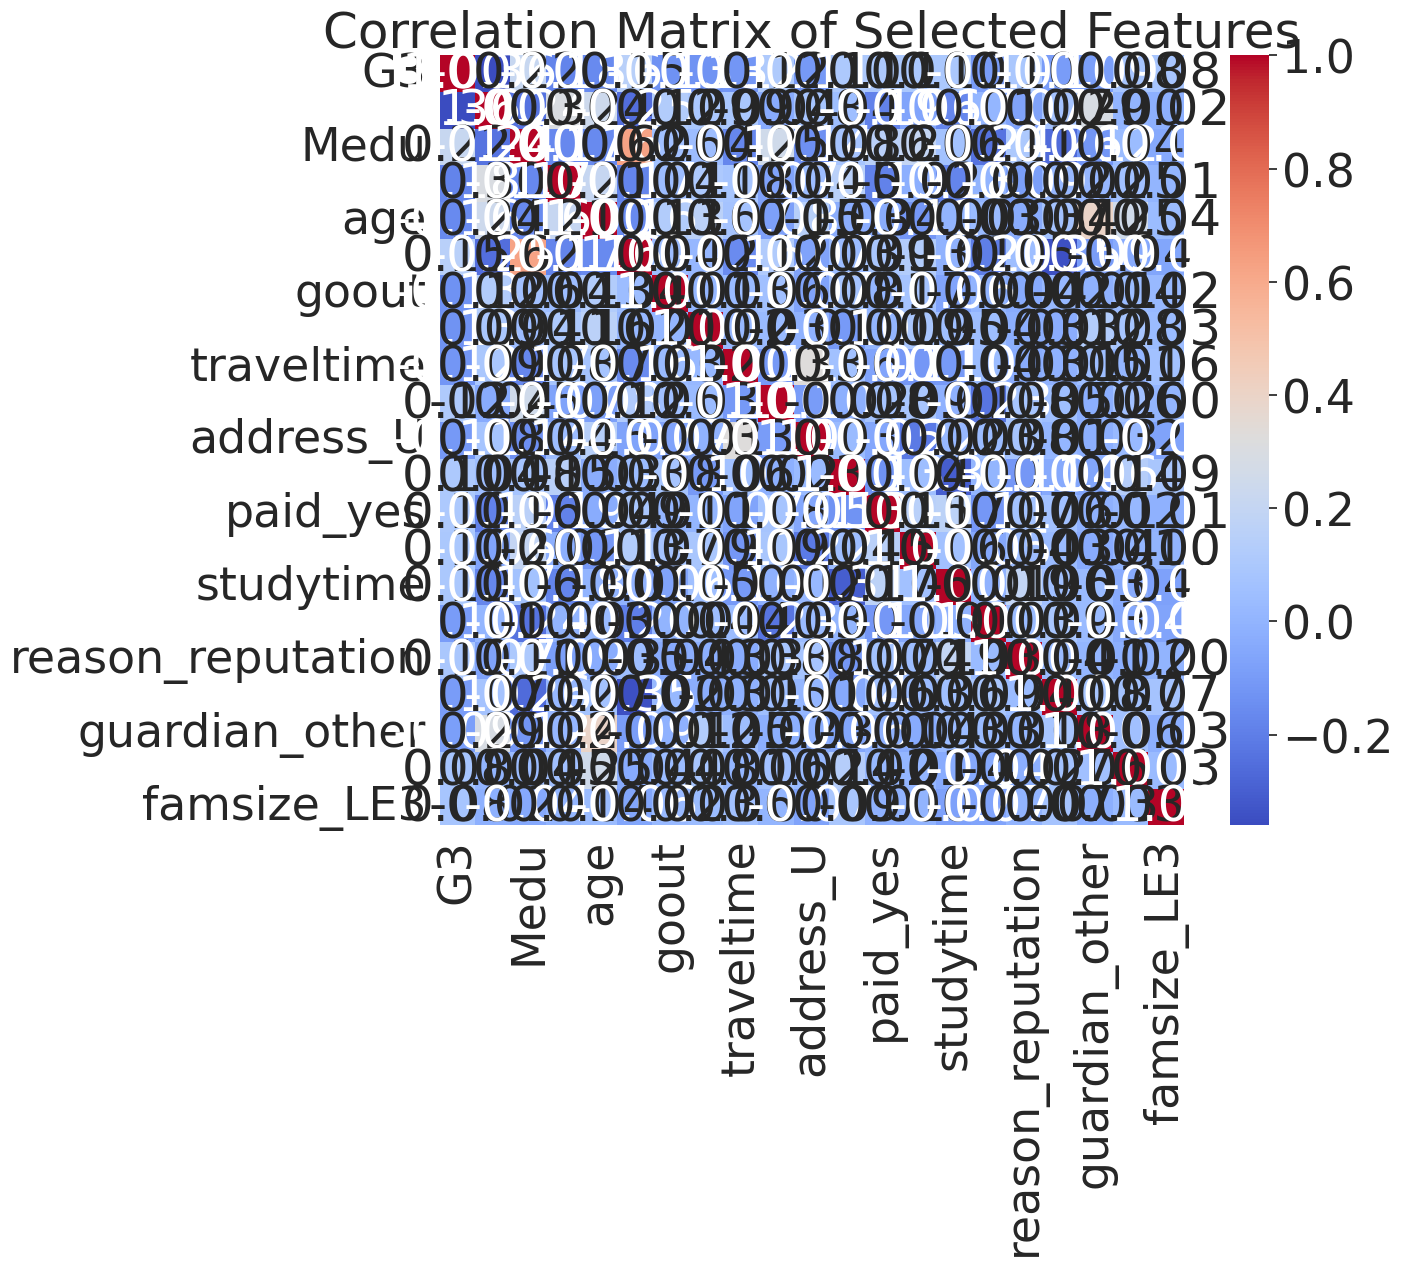

In [409]:
# we only want to plot the features that have a large ccocrrelation to the final
# output
# Set the correlation threshold
threshold = 0.08

# Calculate the correlation matrix
corr_matrix = df.corr()

# Get the absolute correlation values of all features with 'G3'
corr_with_G3 = abs(corr_matrix['G3']).sort_values(ascending=False)

# Select features with correlation above the threshold
selected_features = corr_with_G3[corr_with_G3 > threshold].index

# Drop columns that do not meet the threshold
df = df[selected_features]

# Create the correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [410]:
# We have reduced the amount of columns from 33 to 21 meaning our model only
# considers sections that significantly impact the output, this simplifies the
# model, Making our Dataframe much simpler and hopefully we will avoid
# overfitting.
df.shape

(395, 21)

# visualizing reltionships to output


In [411]:
df['grade_status'] = df['G3'].apply(lambda x: 'Fail' if x < 12 else 'Pass')
df['grade_status'].value_counts()

,count
grade_status,
Fail,233
Pass,162


In [412]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Ensure interactive mode is enabled
pio.renderers.default = 'colab'

# Assuming you have a DataFrame 'df' with a 'grade_status' column
# where 'Failed' and 'Passed' are the values

# Count the number of failed and passed students
counts = df['grade_status'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(values=counts, names=counts.index,
             title='Students that Failed and Passed the Course')

# Customize the chart (optional)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(font_size=16)

fig.show()

In [413]:

# Assuming 'df' is your DataFrame as defined in the previous code.

# Identify binary columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Loop through binary columns and convert them to integers
for col in binary_cols:
    unique_vals = df[col].unique()
    # Assign 0 and 1 based on the order of unique values
    mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
    print(f"Column '{col}': {mapping}") # Explain the mapping
    df[col] = df[col].map(mapping)

# Print the updated DataFrame to verify the changes
print(df.head())


Column 'higher_yes': {0: 0, 1: 1}
Column 'romantic_yes': {0: 0, 1: 1}
Column 'Mjob_health': {0: 0, 1: 1}
Column 'address_U': {0: 0, 1: 1}
Column 'sex_M': {0: 0, 1: 1}
Column 'paid_yes': {0: 0, 1: 1}
Column 'internet_yes': {0: 0, 1: 1}
Column 'Mjob_other': {0: 0, 1: 1}
Column 'reason_reputation': {0: 0, 1: 1}
Column 'Fjob_teacher': {0: 0, 1: 1}
Column 'guardian_other': {0: 0, 1: 1}
Column 'schoolsup_yes': {0: 0, 1: 1}
Column 'famsize_LE3': {0: 0, 1: 1}
Column 'grade_status': {'Fail': 0, 'Pass': 1}
   G3  failures  Medu  higher_yes  age  Fedu  goout  romantic_yes  traveltime  \
0   6         0     4           0   18     4      4             0           2   
1   6         0     1           0   17     1      3             0           1   
2  10         3     1           0   15     1      2             0           1   
3  15         0     4           0   15     2      2             1           1   
4  10         0     3           0   16     3      2             0           1   

   Mjob_hea

In [414]:
failures_matrix = df.corr()
failures_matrix['failures'].sort_values(ascending=False)

,failures
failures,1.000000
higher_yes,0.300316
guardian_other,0.291157
age,0.243665
goout,0.124561
romantic_yes,0.093137
traveltime,0.092239
address_U,0.078578
Fjob_teacher,0.074377
sex_M,0.044436


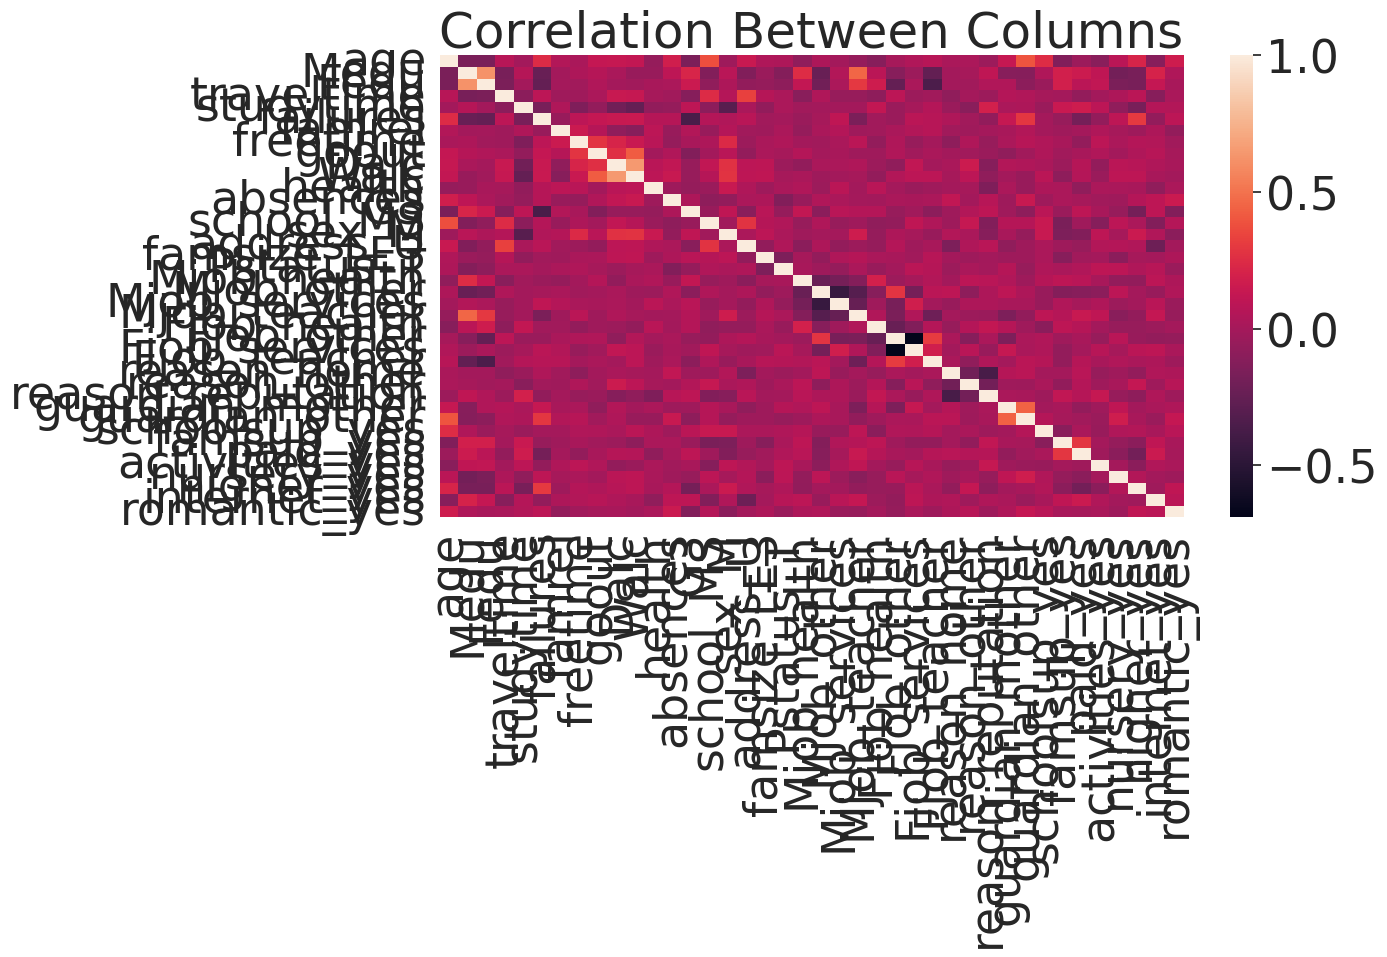

In [415]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix,
           xticklabels=corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values,
            ax = ax,
           ).set_title("Correlation Between Columns")


plt.show()

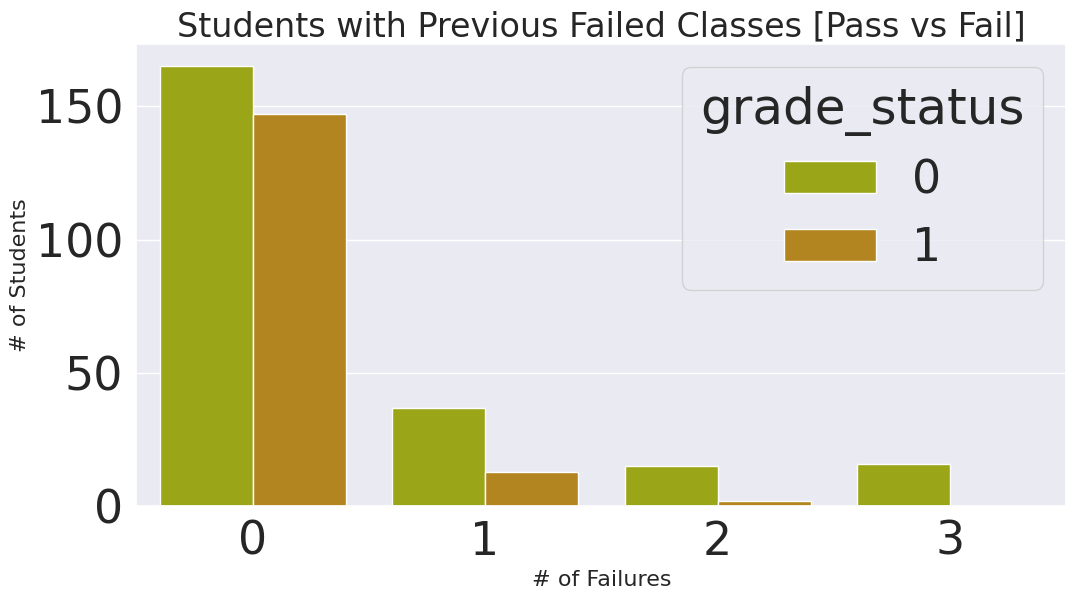

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))
colors = ["#AFBC01", "#CB8E08"]
g = sns.countplot(x="failures", hue="grade_status", palette=colors, data=df)
sns.set(style="darkgrid")
g.axes.set_title("Students with Previous Failed Classes [Pass vs Fail]",fontsize=24)
g.set_xlabel("# of Failures",fontsize=16)
g.set_ylabel("# of Students",fontsize=16)
sns.set(font_scale=3)
plt.show()

In [417]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Ensure Plotly renders properly in the environment
pio.renderers.default = 'colab'  # For Google Colab

# Assuming df already has a 'grade_status' column with 0 (Fail) and 1 (Pass), and a 'failures' column

# Group the data by 'failures' and count the number of Passes (1) and Fails (0)
grouped_df = df.groupby('failures')['grade_status'].value_counts().unstack(fill_value=0).reset_index()

# Check the columns of the grouped_df to ensure they are correctly named
print("Grouped DataFrame Columns: ", grouped_df.columns)
print("Grouped DataFrame Head: ", grouped_df.head())

# Calculate the percentage of Pass (1) and Fail (0) for each number of previous failures
grouped_df['failed_percent'] = grouped_df[0] / (grouped_df[0] + grouped_df[1]) * 100
grouped_df['passed_percent'] = grouped_df[1] / (grouped_df[0] + grouped_df[1]) * 100

# Melt the DataFrame to have a single column for the percentage values and another column for Pass/Fail
melted_df = grouped_df.melt(id_vars=['failures'], value_vars=['failed_percent', 'passed_percent'],
                            var_name='status', value_name='percentage')

# Check the melted DataFrame
print("Melted DataFrame Head: ", melted_df.head())

# Create a grouped bar chart using Plotly Express
fig = px.bar(melted_df, x='failures', y='percentage', color='status',
             barmode='group',
             labels={'percentage': 'Percentage', 'failures': 'Number of Previous Failures'},
             color_discrete_sequence=['#FA5858', '#BEF781'],
             title='% of People with Failures who passed the Course')

# Force the plot to render
fig.show()


Grouped DataFrame Columns:  Index(['failures', 0, 1], dtype='object', name='grade_status')
Grouped DataFrame Head:  grade_status  failures    0    1
0                    0  165  147
1                    1   37   13
2                    2   15    2
3                    3   16    0
Melted DataFrame Head:     failures          status  percentage
0         0  failed_percent   52.884615
1         1  failed_percent   74.000000
2         2  failed_percent   88.235294
3         3  failed_percent  100.000000
4         0  passed_percent   47.115385


download charts for ethics file

# Trying to fix Random Search
model data set, splitting, scaling, and cross validation with random search

In [419]:
# Load dataset and prepare features and labels
grades = df.drop(["G3"], axis=1)  # Drop labels for training
grades_labels = df["G3"].copy()   # Store the target labels separately

print(grades.shape, grades_labels.shape)

# Check the data types for columns
grades.dtypes

# Check for missing values in the dataset
print(grades.isnull().sum())


(395, 21) (395,)
failures             0
Medu                 0
higher_yes           0
age                  0
Fedu                 0
goout                0
romantic_yes         0
traveltime           0
Mjob_health          0
address_U            0
sex_M                0
paid_yes             0
internet_yes         0
studytime            0
Mjob_other           0
reason_reputation    0
Fjob_teacher         0
guardian_other       0
schoolsup_yes        0
famsize_LE3          0
grade_status         0
dtype: int64


In [421]:

# Splitting Data using StratifiedShuffleSplit for better distribution of "Medu" and "failures"
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Medu"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

for train_index, test_index in split.split(df, df["failures"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [422]:

# We want to equally distribute the "failures" values since it's highly correlated with G3
test_labels = strat_test_set["grade_status"]

# Feature scaling using StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

# Define a DataFrameSelector to handle feature selection
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [426]:
# Drop any rows with missing values
grades_scaled = grades_scaled.dropna()
grades_labels = grades_labels.dropna()

# List numerical features
numerical_features = list(grades.select_dtypes(include=[float, int]))

# Pipeline to scale numerical features
numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(numerical_features)),
    ('standard_scaler', StandardScaler())
])

# Fit the scaler on the training data and transform the training data
grades_scaled_numeric = numeric_pipeline.fit_transform(strat_train_set)
grades_scaled = pd.concat([pd.DataFrame(grades_scaled_numeric, columns=numerical_features),
                           strat_train_set.drop(numerical_features, axis=1)], axis=1)

# For the test set, use the same scaler (without fitting again) and apply the transformation
test_scaled_numeric = numeric_pipeline.transform(strat_test_set)
test_scaled = pd.concat([pd.DataFrame(test_scaled_numeric, columns=numerical_features),
                         strat_test_set.drop(numerical_features, axis=1)], axis=1)


In [432]:
print(grades_scaled.isnull().sum())  # Check if any columns in grades_scaled have NaN values
print(grades_labels.isnull().sum())  # Check if grades_labels has NaN values

failures             62
Medu                 62
higher_yes           62
age                  62
Fedu                 62
goout                62
romantic_yes         62
traveltime           62
Mjob_health          62
address_U            62
sex_M                62
paid_yes             62
internet_yes         62
studytime            62
Mjob_other           62
reason_reputation    62
Fjob_teacher         62
guardian_other       62
schoolsup_yes        62
famsize_LE3          62
grade_status         62
G3                   62
dtype: int64
0


In [438]:
grades_scaled = grades_scaled.astype(float)  # Ensure all features are numeric
grades_labels = grades_labels.astype(float)  # Ensure labels are numeric

# Ensure that the indexes are aligned between features and labels
print(grades_scaled.index)
print(grades_labels.index)

# Align the data if necessary
grades_labels = grades_labels.loc[grades_scaled.index]

print(len(grades_scaled))
print(len(grades_labels))

RangeIndex(start=0, stop=378, step=1)
RangeIndex(start=0, stop=378, step=1)
378
378


In [443]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ensure all columns used for fitting are numeric
numerical_features = list(grades.select_dtypes(include=[float, int]))

# Apply scaling to the numerical features
scaler = StandardScaler()
grades_scaled_numeric = scaler.fit_transform(grades[numerical_features])

# Create a new DataFrame with scaled values for the numerical features
grades_scaled = pd.DataFrame(grades_scaled_numeric, columns=numerical_features, index=grades.index) # Use the original index from 'grades'

# Initialize the Linear Regression model
model = LinearRegression()

# Reset the index of grades_scaled and grades_labels if needed
# Ensure that grades_labels is a Series or DataFrame with the same index as grades_scaled
grades_labels = grades_labels.reindex(grades_scaled.index)  # Reindex grades_labels to match grades_scaled

# Now, both datasets should have the same index and consistent number of samples

# Check the shapes before fitting to confirm
print(f"Shape of grades_scaled: {grades_scaled.shape}")
print(f"Shape of grades_labels: {grades_labels.shape}")

# Fit the model
model.fit(grades_scaled, grades_labels)

Shape of grades_scaled: (395, 21)
Shape of grades_labels: (395,)


ValueError: Input y contains NaN.

In [430]:


# Make predictions for training and test sets
train_predictions = model.predict(grades_scaled)
test_predictions = model.predict(test_scaled.drop("G3", axis=1))  # Drop "G3" for prediction

# Get actual labels for the test set
test_labels = strat_test_set["G3"]

# Calculate training and test R^2, RMSE, and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

train_r2 = r2_score(grades_labels, train_predictions)
test_r2 = r2_score(test_labels, test_predictions)

train_rmse = np.sqrt(mean_squared_error(grades_labels, train_predictions))
test_rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))

train_mae = mean_absolute_error(grades_labels, train_predictions)
test_mae = mean_absolute_error(test_labels, test_predictions)

# Print results
print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Random Search for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

# Initialize models and their parameter distributions for RandomizedSearchCV
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest": (RandomForestRegressor(random_state=42), {
        'n_estimators': [3, 10, 30, 50],
        'max_features': [2, 4, 6, 8, 10],
        'bootstrap': [True, False]
    }),
    "Decision Tree": (DecisionTreeRegressor(random_state=42), {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.5]
    }),
    "K-Nearest Neighbors": (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    "Artificial Neural Network": (MLPRegressor(max_iter=500, random_state=42), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }),
    "Support Vector Machine": (SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    "Feature-Based Regression (Ridge)": (Ridge(), {
        'alpha': [0.1, 1.0, 10.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr']
    })
}

# RandomizedSearchCV results
all_results = {}

# Loop through models and perform RandomizedSearchCV for each
for name, (model, param_dist) in models.items():
    print(f"\nTuning {name}...")

    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5,
                                       scoring='neg_mean_squared_error', verbose=1, random_state=42)
    random_search.fit(grades_scaled, grades_labels)

    print(f"Best Parameters for {name}: {random_search.best_params_}")
    cvres = random_search.cv_results_
    model_results = []
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        model_results.append((np.sqrt(-mean_score), params))

    all_results[name] = model_results

# Print all the results for each model with train and test metrics
print("\nAll Models' RandomizedSearchCV Results:")
print("{:<30} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Model", "Train R^2", "Test R^2", "Train RMSE", "Test RMSE", "Train MAE"))

for name, results in all_results.items():
    best_rmse, best_params = min(results, key=lambda x: x[0])

    model = models[name][0]
    model.set_params(**best_params)
    model.fit(grades_scaled, grades_labels)

    train_predictions = model.predict(grades_scaled)
    test_predictions = model.predict(test_scaled.drop("G3", axis=1))

    train_r2 = r2_score(grades_labels, train_predictions)
    test_r2 = r2_score(test_labels, test_predictions)

    train_rmse = np.sqrt(mean_squared_error(grades_labels, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))

    train_mae = mean_absolute_error(grades_labels, train_predictions)
    test_mae = mean_absolute_error(test_labels, test_predictions)

    print(f"{name:<30} {train_r2:<10.4f} {test_r2:<10.4f} {train_rmse:<10.4f} {test_rmse:<10.4f} {train_mae:<10.4f} {test_mae:<10.4f}")

# Plot actual vs predicted for training set
import matplotlib.pyplot as plt
plt.scatter(grades_labels, train_predictions)
plt.title(f"Training Data: Actual vs Predicted")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()

# Plot actual vs predicted for test set
plt.scatter(test_labels, test_predictions)
plt.title(f"Test Data: Actual vs Predicted")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Original Random and Grid Search Split

## model dataset

In [377]:
grades = df.drop(["G3"], axis=1) #we drop the labels for the training set.
grades_labels = df["G3"].copy()

print(grades.shape, grades_labels.shape)

(395, 21) (395,)


In [297]:
# We need to preprocess the categorical values which are:
# We have grade_status, sex, Mjob, Fjob, schoolsup are objects so we need to preprocess those columns.
grades.dtypes

,0
failures,int64
Medu,int64
higher_yes,int64
age,int64
Fedu,int64
goout,int64
romantic_yes,int64
traveltime,int64
Mjob_health,int64
address_U,int64


## Splitting Data

In [378]:
# Becasue we have labeled data we will use a supervised model
from sklearn.model_selection import train_test_split

# Simple way to split our data into Training and testing.
# We use random_state so that everytime we run the data we get the exact same
# split of the data. We don't want the training and testing everytime we run the
# data.
train_set, test_set = train_test_split(grades, test_size=0.2, random_state=42)

print(len(train_set), "Train", len(test_set))

316 Train 79


In [379]:
grades.head()

,failures,Medu,higher_yes,age,Fedu,goout,romantic_yes,traveltime,Mjob_health,address_U,...,paid_yes,internet_yes,studytime,Mjob_other,reason_reputation,Fjob_teacher,guardian_other,schoolsup_yes,famsize_LE3,grade_status
0,0,4,0,18,4,4,0,2,0,0,...,0,0,2,0,0,0,0,0,0,0
1,0,1,0,17,1,3,0,1,0,0,...,0,1,2,0,0,1,0,1,0,0
2,3,1,0,15,1,2,0,1,0,0,...,1,1,2,0,0,1,0,0,1,0
3,0,4,0,15,2,2,1,1,1,0,...,1,1,3,0,0,1,0,1,0,1
4,0,3,0,16,3,2,0,1,0,0,...,1,0,2,1,0,1,0,1,0,0


In [386]:
df=grades.copy()
# Code from HandsOn Machine Learning with ScikitLearn and Tensorflow by Aurélien Geron.
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Medu"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

for train_index, test_index in split.split(df, df["failures"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# We want to equally distribute in our training and test set the failures values since it is the highest correlated with G3.
# It is more convenient to use StratifiedShuffleSplit on columns that are highly correlated and equally distributed it tends to
# vary less.
test_labels = strat_test_set["grade_status"]

print(df['Medu'].value_counts()/len(df))
print(df['failures'].value_counts()/len(df))

Medu
4    0.331646
2    0.260759
3    0.250633
1    0.149367
0    0.007595
Name: count, dtype: float64
failures
0    0.789873
1    0.126582
2    0.043038
3    0.040506
Name: count, dtype: float64


## feature scaling

In [387]:
# Transform our numeric values into a StandardScaler form for better performance of the linear regressoin model.
# We use pipeline to automize the steps for the linear regression model.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
    ('standard_scaler', StandardScaler())
])

# fit and transorm into standard_scaler form the numeric values.
grading_numeric_tr = numeric_pipeline.fit_transform(grades)
grading_numeric_tr

array([[-0.44994364,  1.14385567, -0.23094011, ..., -2.59713266,
        -0.63694109, -0.8338339 ],
       [-0.44994364, -1.60000865, -0.23094011, ...,  0.38504002,
        -0.63694109, -0.8338339 ],
       [ 3.58932316, -1.60000865, -0.23094011, ..., -2.59713266,
         1.57000391, -0.8338339 ],
       ...,
       [ 3.58932316, -1.60000865, -0.23094011, ...,  0.38504002,
        -0.63694109, -0.8338339 ],
       [-0.44994364,  0.22923423, -0.23094011, ...,  0.38504002,
         1.57000391, -0.8338339 ],
       [-0.44994364, -1.60000865, -0.23094011, ...,  0.38504002,
         1.57000391, -0.8338339 ]])

In [388]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

# List numerical features only (categorical are already one-hot encoded)
numerical_features = list(grades)

# Pipeline to scale numerical features
numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(numerical_features)),
    ('standard_scaler', StandardScaler())
])

# Transform only the numerical data and keep the entire dataset for modeling
grades_scaled_numeric = numeric_pipeline.fit_transform(grades)

# Concatenate the scaled numerical data with the pre-encoded categorical data
grades_scaled = pd.concat([pd.DataFrame(grades_scaled_numeric, columns=numerical_features), grades.drop(numerical_features, axis=1)], axis=1)

# Fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(grades_scaled, grades_labels)

# Check scaled data and model fit
print(grades_scaled.shape)


(395, 21)


In [389]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# Define DataFrameSelector class (if not already defined)
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# List numerical features only (categorical are already one-hot encoded)
numerical_features = list(grades)

# Pipeline to scale numerical features
numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(numerical_features)),
    ('standard_scaler', StandardScaler())
])

# Transform only the numerical data and keep the entire dataset for modeling
grades_scaled_numeric = numeric_pipeline.fit_transform(grades)

# Concatenate the scaled numerical data with the pre-encoded categorical data
grades_scaled = pd.concat([pd.DataFrame(grades_scaled_numeric, columns=numerical_features), grades.drop(numerical_features, axis=1)], axis=1)

# Fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(grades_scaled, grades_labels)

# Check scaled data and model fit
print(grades_scaled.shape)

(395, 21)


## Comparing all models

In [331]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Artificial Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "Feature-Based Regression-Ridge": Ridge(alpha=1.0),
    "Support Vector Machine": SVR(kernel='rbf')
}

# Dictionary to store results
results = {}

# Fit each model and calculate metrics
for name, model in models.items():
    model.fit(grades_scaled, grades_labels)
    predictions = model.predict(grades_scaled)

    # Calculate metrics
    r2 = r2_score(grades_labels, predictions)
    rmse = np.sqrt(mean_squared_error(grades_labels, predictions))
    mae = mean_absolute_error(grades_labels, predictions)

    # Store the results
    results[name] = {'R^2': r2, 'RMSE': rmse, 'MAE': mae}

# Special handling for Naive Bayes (only if target is categorical)
# Uncomment below lines if using Naive Bayes for classification with a categorical target
# nb_clf = GaussianNB()
# nb_clf.fit(grades_scaled, grades_labels)
# nb_predictions = nb_clf.predict(grades_scaled)
# results["Naive Bayes"] = {
#     'R^2': r2_score(grades_labels, nb_predictions),
#     'RMSE': np.sqrt(mean_squared_error(grades_labels, nb_predictions)),
#     'MAE': mean_absolute_error(grades_labels, nb_predictions)
# }

# Print results
print("{:<30} {:<10} {:<10} {:<10}".format("Model", "R^2", "RMSE", "MAE"))
print("-" * 60)
for name, metrics in results.items():
    print("{:<30} {:<10.4f} {:<10.4f} {:<10.4f}".format(name, metrics['R^2'], metrics['RMSE'], metrics['MAE']))


Model                          R^2        RMSE       MAE       
------------------------------------------------------------
Linear Regression              0.2289     4.0180     3.0530    
Random Forest                  0.8678     1.6637     1.2540    
Decision Tree                  0.9995     0.1067     0.0076    
Gradient Boosting              0.5649     3.0183     2.2756    
K-Nearest Neighbors            0.3381     3.7225     2.7954    
Artificial Neural Network      0.6579     2.6764     1.9867    
Feature-Based Regression-Ridge 0.2289     4.0180     3.0529    
Support Vector Machine         0.3081     3.8059     2.5683    


## Random Search

In [334]:
#random search
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Initialize models and their parameter distributions for RandomizedSearchCV
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest": (RandomForestRegressor(random_state=42), {
        'n_estimators': [3, 10, 30, 50],
        'max_features': [2, 4, 6, 8, 10],
        'bootstrap': [True, False]
    }),
    "Decision Tree": (DecisionTreeRegressor(random_state=42), {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.5]
    }),
    "K-Nearest Neighbors": (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    "Artificial Neural Network": (MLPRegressor(max_iter=500, random_state=42), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    }),
    "Support Vector Machine": (SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    "Feature-Based Regression (Ridge)": (Ridge(), {
        'alpha': [0.1, 1.0, 10.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr']
    })
}

# Dictionary to store results
all_results = {}

# Loop through models and perform RandomizedSearchCV for each
for name, (model, param_dist) in models.items():
    print(f"\nTuning {name}...")

    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5,
                                       scoring='neg_mean_squared_error', verbose=1, random_state=42)
    random_search.fit(grades_scaled, grades_labels)

    # Best parameters for the current model
    print(f"Best Parameters for {name}: {random_search.best_params_}")

    # Store the best parameters and RMSE for the model
    cvres = random_search.cv_results_
    model_results = []
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        model_results.append((np.sqrt(-mean_score), params))

    all_results[name] = model_results


Tuning Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for Linear Regression: {}

Tuning Random Forest...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters for Random Forest: {'n_estimators': 50, 'max_features': 6, 'bootstrap': True}

Tuning Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5}

Tuning Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Gradient Boosting: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}

Tuning K-Nearest Neighbors...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for K-Nearest Neighbors: {'weights': 'distance', 'n_neighbors': 7, 'algorithm': 'kd_tree'}

Tuning Artificial Neural Network...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameter

In [396]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Print all the results for each model with train and test metrics
print("\nAll Models' RandomizedSearchCV Results:")
print("{:<30} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Model", "Train R^2", "Test R^2", "Train RMSE", "Test RMSE", "Train MAE"))

for name, results in all_results.items():
    # Get the best result (best RMSE) from RandomizedSearchCV for each model
    best_rmse, best_params = min(results, key=lambda x: x[0])

    # Train the model with the best parameters found
    model = models[name][0]
    model.set_params(**best_params)
    model.fit(grades_scaled, grades_labels)

    # Get the columns from the training data
    train_cols = grades_scaled.columns

    # Reindex the test data to match the training data columns
    X_test_scaled = X_test_scaled.reindex(columns=train_cols, fill_value=0)

    # Make predictions for training and test sets
    train_predictions = model.predict(grades_scaled)
    test_predictions = model.predict(strat_test_set)

    # Calculate training and test R^2, RMSE, and MAE
    train_r2 = r2_score(grades_labels, train_predictions)
    test_r2 = r2_score(test_labels, test_predictions)

    train_rmse = np.sqrt(mean_squared_error(grades_labels, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))

    train_mae = mean_absolute_error(grades_labels, train_predictions)
    test_mae = mean_absolute_error(test_labels, test_predictions)

    # Print the results in the requested format
    print(f"{name:<30} {train_r2:<10.4f} {test_r2:<10.4f} {train_rmse:<10.4f} {test_rmse:<10.4f} {train_mae:<10.4f} {test_mae:<10.4f}")



All Models' RandomizedSearchCV Results:
Model                          Train R^2  Test R^2   Train RMSE Test RMSE  Train MAE 
Linear Regression              0.5947     -563.6663  2.9131     11.7194    2.2387     11.6426   
Random Forest                  0.9247     -463.9174  1.2554     10.6340    0.9316     10.1337   
Decision Tree                  0.6561     -549.8666  2.6832     11.5753    1.9922     10.8342   
Gradient Boosting              0.6256     -478.3902  2.7998     10.7982    2.0560     10.3372   
K-Nearest Neighbors            0.9995     -397.8644  0.1067     9.8497     0.0076     9.7796    
Artificial Neural Network      0.7470     -272.4342  2.3017     8.1552     1.7595     8.1310    
Support Vector Machine         0.5257     -413.7018  3.1513     10.0433    1.8270     10.0312   
Feature-Based Regression (Ridge) 0.5943     -540.3902  2.9143     11.4753    2.2215     11.4000   


Train Predictions: [ 8.50256077  8.03807255  6.73826553 14.44519811  8.01480348 15.92100392
  8.37479151  8.14344592 15.73996848 14.84181406]
Test Predictions: [14.29240739 13.94143878 10.81531524 13.25464647 10.54880756 10.15524994
 10.33533672 10.92410605 11.15758441 10.30572239]


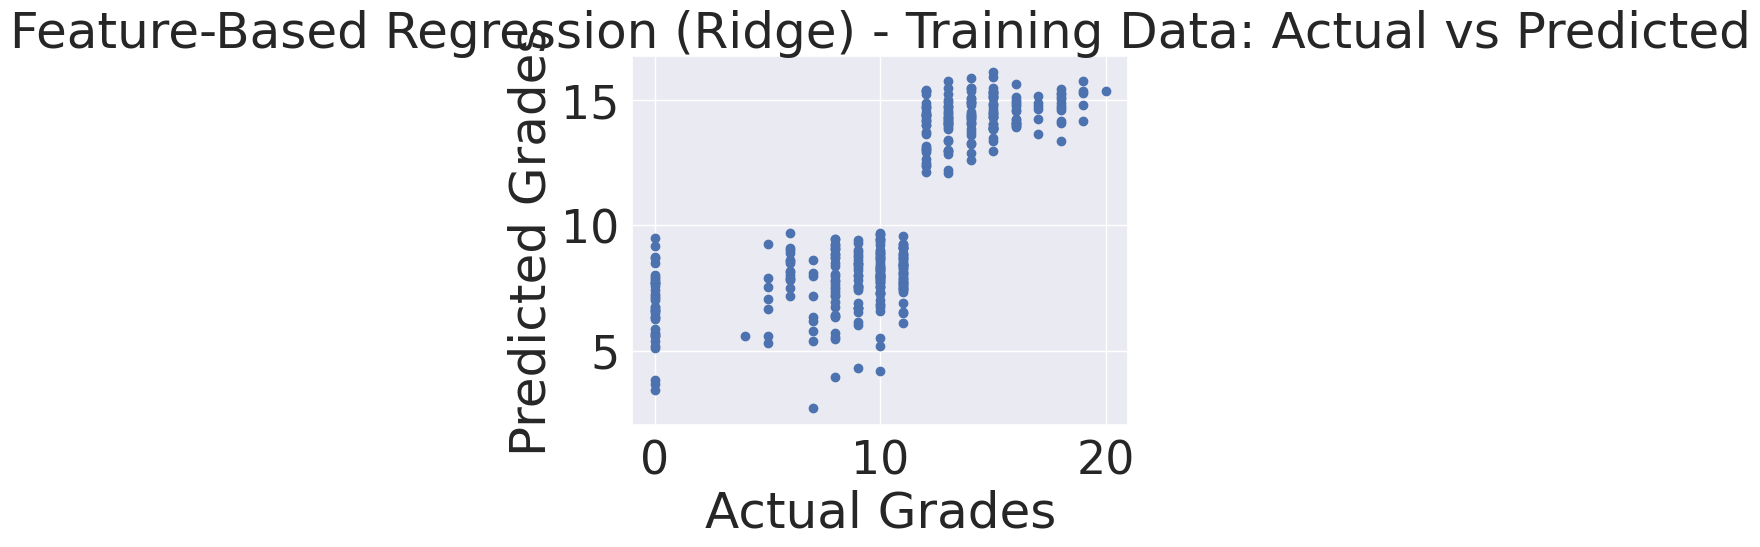

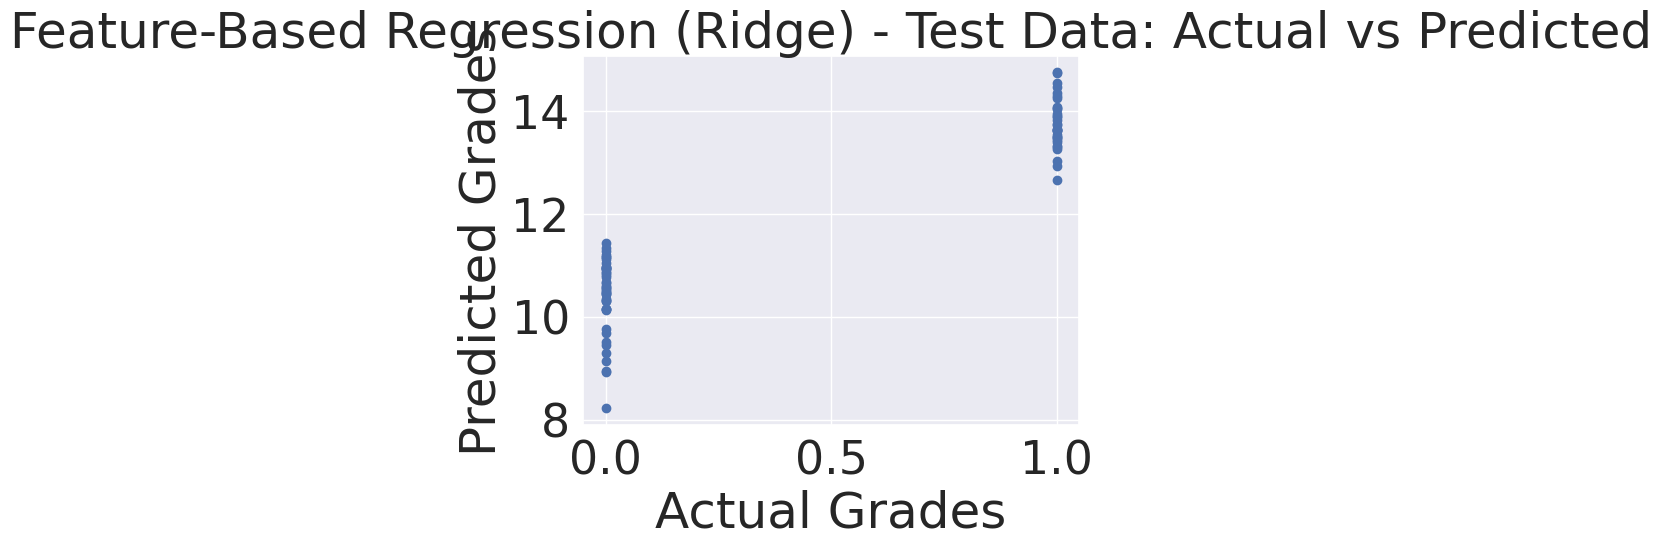

In [397]:
# Print the first few predictions
print("Train Predictions:", train_predictions[:10])
print("Test Predictions:", test_predictions[:10])

import matplotlib.pyplot as plt

# Plot actual vs predicted for training set
plt.scatter(grades_labels, train_predictions)
plt.title(f"{name} - Training Data: Actual vs Predicted")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()

# Plot actual vs predicted for test set
plt.scatter(y_test, test_predictions)
plt.title(f"{name} - Test Data: Actual vs Predicted")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()

In [ ]:
contour plot to show hyperparameters

## Grid Search

In [333]:
#gridsearch

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize models and their parameter grids
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest": (RandomForestRegressor(random_state=42), [
        {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10]},
        {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5]}
    ]),
    "Decision Tree": (DecisionTreeRegressor(random_state=42), [
        {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    ]),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), [
        {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 0.5]}
    ]),
    "K-Nearest Neighbors": (KNeighborsRegressor(), [
        {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    ]),
    "Artificial Neural Network": (MLPRegressor(max_iter=500, random_state=42), [
        {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']}
    ]),
    "Support Vector Machine": (SVR(), [
        {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
    ]),
    "Feature-Based Regression (Ridge)": (Ridge(), [
        {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr']}
    ])
}

# Dictionary to store results
all_results = {}

# Loop through models and perform GridSearchCV for each
for name, (model, param_grid) in models.items():
    print(f"\nTuning {name}...")

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(grades_scaled, grades_labels)

    # Best parameters for the current model
    print(f"Best Parameters for {name}: {grid_search.best_params_}")

    # Store the best parameters and RMSE for the model
    cvres = grid_search.cv_results_
    model_results = []
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        model_results.append((np.sqrt(-mean_score), params))

    all_results[name] = model_results

# Print all the results for each model
print("\nAll Models' GridSearchCV Results:")
print("{:<30} {:<10} {:<10}".format("Model", "Best Params", "Best RMSE"))
for name, results in all_results.items():
    best_rmse, best_params = min(results, key=lambda x: x[0])
    print(f"{name:<30} {str(best_params):<25} {best_rmse:.4f}")



Tuning Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for Linear Regression: {}

Tuning Random Forest...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for Random Forest: {'max_features': 6, 'n_estimators': 50}

Tuning Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Tuning Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

# Saving the model

In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Assuming you've already trained your model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')

https://chatgpt.com/share/672fa8af-5ae0-8000-87b2-4fa7ea884c02

# Unneded

## Models

linear regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the scaled data
predictions = lin_reg.predict(grades_scaled)

# Calculate metrics
r2 = r2_score(grades_labels, predictions)
rmse = np.sqrt(mean_squared_error(grades_labels, predictions))
mae = mean_absolute_error(grades_labels, predictions)

print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


R^2: 0.22889010310280533
RMSE: 4.018000185547768
MAE: 3.0530371650438286


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor()
rf_reg.fit(grades_scaled, grades_labels)

# Make predictions
rf_predictions = rf_reg.predict(grades_scaled)

# Calculate metrics
r2_rf = r2_score(grades_labels, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(grades_labels, rf_predictions))
mae_rf = mean_absolute_error(grades_labels, rf_predictions)

print(f"Random Forest R^2: {r2_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MAE: {mae_rf}")


Random Forest R^2: 0.8704674333132105
Random Forest RMSE: 1.6468016727484487
Random Forest MAE: 1.254194936708861


𝑘-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the K-Nearest Neighbors model
knn_reg = KNeighborsRegressor()
knn_reg.fit(grades_scaled, grades_labels)

# Make predictions
knn_predictions = knn_reg.predict(grades_scaled)

# Calculate metrics
r2_knn = r2_score(grades_labels, knn_predictions)
rmse_knn = np.sqrt(mean_squared_error(grades_labels, knn_predictions))
mae_knn = mean_absolute_error(grades_labels, knn_predictions)

print(f"KNN R^2: {r2_knn}")
print(f"KNN RMSE: {rmse_knn}")
print(f"KNN MAE: {mae_knn}")


KNN R^2: 0.3381353903460893
KNN RMSE: 3.72251446257105
KNN MAE: 2.795443037974683


Artificial Neural Network (ANN)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the ANN model
ann_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann_reg.fit(grades_scaled, grades_labels)

# Make predictions
ann_predictions = ann_reg.predict(grades_scaled)

# Calculate metrics
r2_ann = r2_score(grades_labels, ann_predictions)
rmse_ann = np.sqrt(mean_squared_error(grades_labels, ann_predictions))
mae_ann = mean_absolute_error(grades_labels, ann_predictions)

print(f"ANN R^2: {r2_ann}")
print(f"ANN RMSE: {rmse_ann}")
print(f"ANN MAE: {mae_ann}")


ANN R^2: 0.6578651708494465
ANN RMSE: 2.6763965265839014
ANN MAE: 1.9866748027199874


Decision Tree Regressor (DT)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(grades_scaled, grades_labels)

# Make predictions
dt_predictions = dt_reg.predict(grades_scaled)

# Calculate metrics
r2_dt = r2_score(grades_labels, dt_predictions)
rmse_dt = np.sqrt(mean_squared_error(grades_labels, dt_predictions))
mae_dt = mean_absolute_error(grades_labels, dt_predictions)

print("Decision Tree Regressor")
print(f"R^2: {r2_dt}")
print(f"RMSE: {rmse_dt}")
print(f"MAE: {mae_dt}")


Decision Tree Regressor
R^2: 0.9994558585740464
RMSE: 0.10673521004472301
MAE: 0.007594936708860759


Naive Bayes (BF)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_clf = GaussianNB()
nb_clf.fit(grades_scaled, grades_labels)

# Make predictions
nb_predictions = nb_clf.predict(grades_scaled)

# Calculate metrics (for classification)
r2_nb = r2_score(grades_labels, nb_predictions)
rmse_nb = np.sqrt(mean_squared_error(grades_labels, nb_predictions))
mae_nb = mean_absolute_error(grades_labels, nb_predictions)

print("Naive Bayes Classifier")
print(f"R^2: {r2_nb}")
print(f"RMSE: {rmse_nb}")
print(f"MAE: {mae_nb}")

Naive Bayes Classifier
R^2: -0.9757170574790901
RMSE: 6.431528353511731
MAE: 5.222784810126583


Gradient Boosting Regressor (GRB)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
grb_reg = GradientBoostingRegressor(random_state=42)
grb_reg.fit(grades_scaled, grades_labels)

# Make predictions
grb_predictions = grb_reg.predict(grades_scaled)

# Calculate metrics
r2_grb = r2_score(grades_labels, grb_predictions)
rmse_grb = np.sqrt(mean_squared_error(grades_labels, grb_predictions))
mae_grb = mean_absolute_error(grades_labels, grb_predictions)

print("Gradient Boosting Regressor")
print(f"R^2: {r2_grb}")
print(f"RMSE: {rmse_grb}")
print(f"MAE: {mae_grb}")

Gradient Boosting Regressor
R^2: 0.5648565602787701
RMSE: 3.0183391307946135
MAE: 2.275583883166268


Feature-Based Regression (FBR) using Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the Ridge Regression model
fbr_reg = Ridge(alpha=1.0)
fbr_reg.fit(grades_scaled, grades_labels)

# Make predictions
fbr_predictions = fbr_reg.predict(grades_scaled)

# Calculate metrics
r2_fbr = r2_score(grades_labels, fbr_predictions)
rmse_fbr = np.sqrt(mean_squared_error(grades_labels, fbr_predictions))
mae_fbr = mean_absolute_error(grades_labels, fbr_predictions)

print("Feature-Based Regression (Ridge)")
print(f"R^2: {r2_fbr}")
print(f"RMSE: {rmse_fbr}")
print(f"MAE: {mae_fbr}")


Feature-Based Regression (Ridge)
R^2: 0.22888892230744284
RMSE: 4.018003261914826
MAE: 3.052910138002964


Support Vector Machine Regression (SVM)

In [ ]:
from sklearn.svm import SVR

# Initialize and train the Support Vector Regressor
svm_reg = SVR(kernel='rbf')  # Using RBF kernel; you can change it to 'linear' if needed
svm_reg.fit(grades_scaled, grades_labels)

# Make predictions
svm_predictions = svm_reg.predict(grades_scaled)

# Calculate metrics
r2_svm = r2_score(grades_labels, svm_predictions)
rmse_svm = np.sqrt(mean_squared_error(grades_labels, svm_predictions))
mae_svm = mean_absolute_error(grades_labels, svm_predictions)

print("Support Vector Machine Regression")
print(f"R^2: {r2_svm}")
print(f"RMSE: {rmse_svm}")
print(f"MAE: {mae_svm}")

Support Vector Machine Regression
R^2: 0.30813888344036056
RMSE: 3.805934200011079
MAE: 2.568325337795452


## cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define a function to perform cross-validation and return results
def evaluate_model_with_cv(model, X, y):
    # Perform 5-fold cross-validation and return the negative mean squared error (as sklearn returns negative for score metrics)
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    predictions = cross_val_predict(model, X, y, cv=5)

    # Compute the RMSE (Root Mean Squared Error)
    rmse = np.sqrt(-scores.mean())

    # Compute the MAE (Mean Absolute Error)
    mae = mean_absolute_error(y, predictions)

    # Compute R^2 (Coefficient of Determination)
    r2 = model.fit(X, y).score(X, y)  # Fit the model to calculate R^2 on the whole dataset (for simplicity)

    return {
        'Model': model.__class__.__name__,
        'R^2': r2,
        'RMSE': rmse,
        'MAE': mae
    }

# List of models
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(),
    SVC(),
    Ridge()
]

# Perform cross-validation for each model
results = []
for model in models:
    result = evaluate_model_with_cv(model, X, y)
    results.append(result)

# Create a DataFrame to show the results
import pandas as pd
results_df = pd.DataFrame(results)

print(results_df)

NameError: name 'X' is not defined

## outliers
**❌dont run this cell❌**

In [ ]:
# prompt: check for and show outliers then remove and show new data

# Assuming 'df' is your DataFrame as defined in the previous code.

# Identify numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers


# Show outliers for each numerical column before removing
for col in numerical_cols:
  print(f"Outliers in {col}:")
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(outliers[col])


# Remove outliers for each numerical column
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

# Show the DataFrame after removing outliers
print("\nDataFrame after removing outliers:")
print(df.head())

Outliers in age:
247    22
Name: age, dtype: int64
Outliers in Medu:
Series([], Name: Medu, dtype: int64)
Outliers in Fedu:
76     0
171    0
Name: Fedu, dtype: int64
Outliers in traveltime:
61     4
108    4
134    4
149    4
164    4
228    4
327    4
375    4
Name: traveltime, dtype: int64
Outliers in studytime:
47     4
66     4
67     4
69     4
70     4
71     4
76     4
77     4
94     4
95     4
105    4
106    4
108    4
121    4
140    4
204    4
210    4
256    4
259    4
271    4
282    4
293    4
298    4
303    4
330    4
334    4
338    4
Name: studytime, dtype: int64
Outliers in failures:
2      3
18     3
25     2
40     1
44     1
      ..
384    1
387    1
389    1
390    2
392    3
Name: failures, Length: 83, dtype: int64
Outliers in famrel:
25     1
27     2
37     2
46     2
60     2
66     1
79     2
108    1
140    2
141    2
150    2
156    2
184    1
206    2
207    1
222    2
238    2
240    2
278    2
296    2
299    1
349    2
357    1
363    2
389    1
391